# Spherical Harmonics Normalization and Parseval's theorem

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from pyshtools.shclasses import SHCoeffs, SHGrid, SHWindow


pyshtools 3.3-beta -- Tools for working with spherical harmonics.


## the energy and variance of a single spherical harmonic

We demonstrate in this paragraph two properties of 4 pi normalized spherical harmonics. We initializing the coefficient class with a single non-zero coefficient. To make things simple, we fix the coefficient value, and therefore also its' energy to 1.

We then compute the normalization N that is by default fixed to 4pi in shtools. The variance of the spherical harmonic is the integral of its square amplitude (norm) divided by the surface area of the sphere (=4pi) and should in the 4pi normalization correspond to 1.

$$N = \int_\Omega Y^2_{lm}(\mathbf{r})~d\Omega$$
$$Var(Y_{lm}(\mathbf{r})) = \frac{N}{4 \pi} = 1$$

The integrals are easy to compute using the DH2 grid that has even latitude / longitude spacing.

total coefficient power is: 1.0


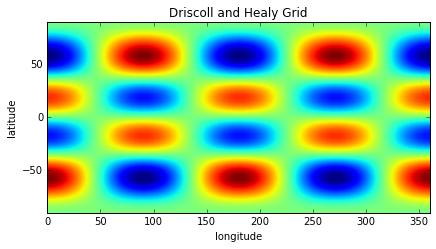

correct surface (4 pi) = 12.5663706144
computed surface = 12.5661122277
computed spherical harmonics energy = 12.5663706143
variance = spherical harmonics energy / surface = 1.00002056217


In [66]:
# initialize the model with a single harmonic
lmax = 99
coeffs = SHCoeffs.from_zeros(lmax)
coeffs.set_coeffs(values=[1], ls=[5], ms=[2])

power = coeffs.get_powerperdegree()
print 'total coefficient power is:', power.sum()

grid = coeffs.expand('DH2')
grid.plot_rawdata()

# generate spatial grid
lats = grid.get_lats()
lons = grid.get_lons()
latgrid, longrid = np.meshgrid(lats, lons, indexing='ij')

# first compute spherical surface element to weigh the different
# grid points correctly
weights = np.cos(np.radians(latgrid))
dlat = np.radians(lats[0] - lats[1])
dlon = np.radians(lons[1] - lons[0])
surface = weights.sum() * dlat * dlon
print 'correct surface (4 pi) =', 4 * np.pi
print 'computed surface =', surface

# now compute the model variance
sh_energy = np.sum(grid.data**2 * weights) * dlat * dlon

print 'computed spherical harmonics energy =', sh_energy
print 'variance = spherical harmonics energy / surface =', sh_energy / surface

## Parseval's theorem in the case of a random model

We have seen in the previous example, that a 4pi normalized spherical harmonic has variance one or the energy of its coefficient value. Because spherical harmonics are orthogonal functions on the sphere, the total variance of a model with a given spectrum is the sum of the variances of the independent spherical harmonics. This means that the total model variance is simply the total coefficient energy in case of 4pi normalization. Furthermore, if the coefficients of all spherical harmonics are independent, the distribution will become Gaussian as predicted by the central limit theorem, or it will be perfectly Gaussian if the individual coefficients were Gaussian in the first place.

We illustrate this behaviour in the following short code snippet.

total coefficient power = 44.2896772422


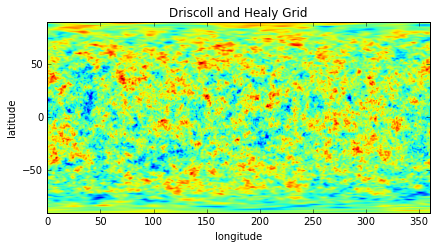

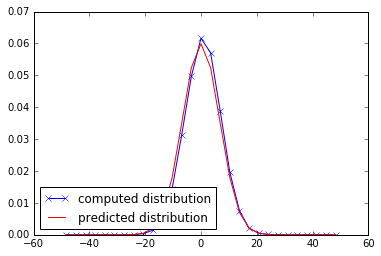

In [102]:
nl = 200
a = 30
ls = np.arange(nl, dtype=float)
power = 1. / (1. + (ls / a) ** 2) ** 1
coeffs = SHCoeffs.from_random(power)
power = coeffs.get_powerperdegree()
total_power = power_random.sum()
print 'total coefficient power =', total_power

grid = coeffs.expand('DH2')
grid.plot_rawdata()

# generate spatial grid
lats = grid.get_lats()
lons = grid.get_lons()
latgrid, longrid = np.meshgrid(lats, lons, indexing='ij')

# first compute spherical surface element to weigh the different
# grid points correctly
weights = np.cos(np.radians(latgrid))
dlat = np.radians(lats[0] - lats[1])
dlon = np.radians(lons[1] - lons[0])
surface = weights.sum() * dlat * dlon

# compute distribution
bins = np.linspace(-50, 50, 30)
center = 0.5 * (bins[:-1] + bins[1:])
dbin = center[1] - center[0]
hist, bins = np.histogram(grid.data, bins=bins, weights=weights, density=True)

# compute expected distribution
normal_distribution = np.exp( - center ** 2 / (2 * total_power))
normal_distribution /= dbin * normal_distribution.sum()

# plot both distributions
fig, ax = plt.subplots(1, 1)
ax.plot(center, hist, '-x', c='blue', label='computed distribution')
ax.plot(center, normal_distribution, c='red', label='predicted distribution')
ax.legend(loc=3);